In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/marcel0501/Wine/refs/heads/main/WineQT.csv")
df.describe()
Dep_var = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
X = df[Dep_var]
y = df["quality"]




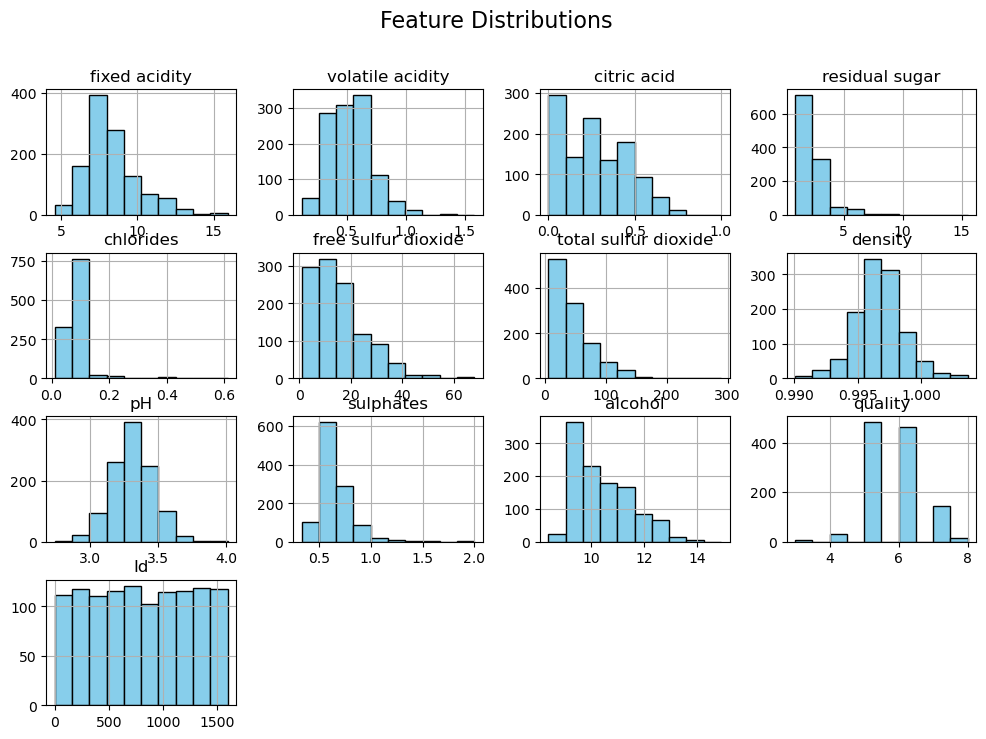

In [3]:
df.hist(figsize=(12, 8),bins = 10, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

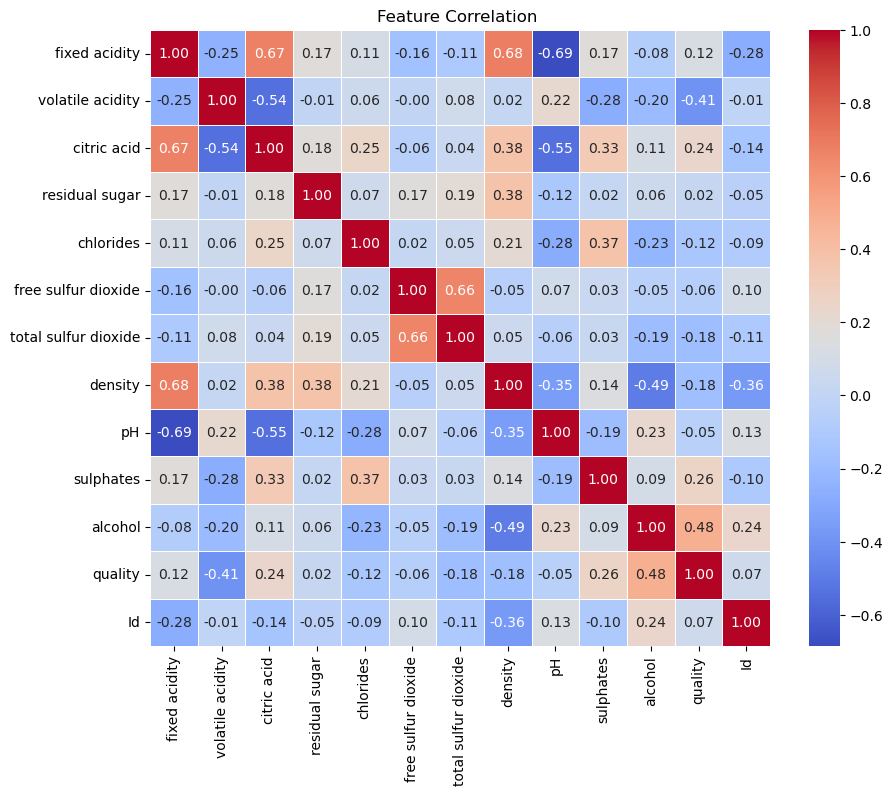

In [4]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation ")
plt.show()

In [5]:
#Group wine in classes Low: 3/5 Med: 6, High:7/10
df["quality"]=df['quality'].replace({3:0,
                                     4:0,
                                     5:0,
                                     6:1,
                                     7:2,
                                     8:2,
                                     9:2,
                                     10:2
                                     })
y = df['quality']
#3rd class imbalanced -> use of SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)
